In [265]:
from mlchartist.array_builder import full_dataset_randomised_arrays_
from mlchartist.preprocessing import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [267]:
# Reads Nasdaq 100 components

nasdaq100 = pd.read_csv('../../raw_data/nasdaq100.csv', header=None)

In [268]:
nasdaq100_list = list(nasdaq100.values.flatten())

In [269]:
# Samples n random companies from Nasdaq 100 list

rand_tickers = random.sample(nasdaq100_list, 15)

In [270]:
joined_df = pd.DataFrame()

# Takes nrows from history from each company from the sample
nrows = 3000

for ticker in rand_tickers:
    ticker_path = '../../raw_data/processed/' + ticker.strip().lower() + '.csv'
    ticker_df = pd.read_csv(ticker_path, nrows=nrows)
    joined_df = joined_df.append(ticker_df)
    

In [271]:
# Prints sample tickers list

for tick in rand_tickers:
    print(tick)

KHC
NXPI
AAL
EBAY
BIDU
AMZN
CHTR
LBTYA
CSCO
MAR
ISRG
GOOG
ULTA
PEP
UAL


In [272]:
joined_df['date'] = pd.to_datetime(joined_df['date'])

FIVE_TR = 0.0006
TEN_TR = 0.0012
TWENTY_TR = 0.0024

# Drops 'ADI' and 'OBV' from input columns
# INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ADI','OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']
INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']


joined_df['5D_return_bin'] = (joined_df['5TD_return'] >= FIVE_TR)
joined_df['10D_return_bin'] = (joined_df['10TD_return'] >= TEN_TR)
joined_df['20D_return_bin'] = (joined_df['20TD_return'] >= TWENTY_TR)

In [273]:
joined_df.head()

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
0,KHC,2020-12-23,65.333960,70.323488,67.224006,5.977632e+07,-413872467,0.646765,36.389756,33.286814,...,0.752943,-0.004023,-0.033908,-0.030172,0.011922,0.010746,0.016949,False,False,False
1,KHC,2020-12-22,61.847562,61.874927,69.485532,5.908194e+07,-417450059,0.646516,35.778920,33.124575,...,0.758641,0.008142,-0.020209,-0.043036,-0.005207,0.001748,0.001456,True,False,False
2,KHC,2020-12-21,64.491677,69.473604,79.890074,6.200842e+07,-413732634,0.660094,35.370662,33.190830,...,0.763946,0.009546,-0.018224,-0.051779,-0.005752,0.004358,0.028869,True,False,False
3,KHC,2020-12-18,67.467630,77.108066,86.038694,5.855279e+07,-408549183,0.660871,35.096792,35.701973,...,0.760506,0.012655,-0.034513,-0.054932,0.004333,0.020546,0.019050,True,False,False
4,KHC,2020-12-17,66.387439,93.088553,88.151069,6.297624e+07,-419743872,0.645576,33.766482,32.332651,...,0.750759,0.010399,-0.011265,-0.065280,0.005518,0.015249,0.034978,True,False,False


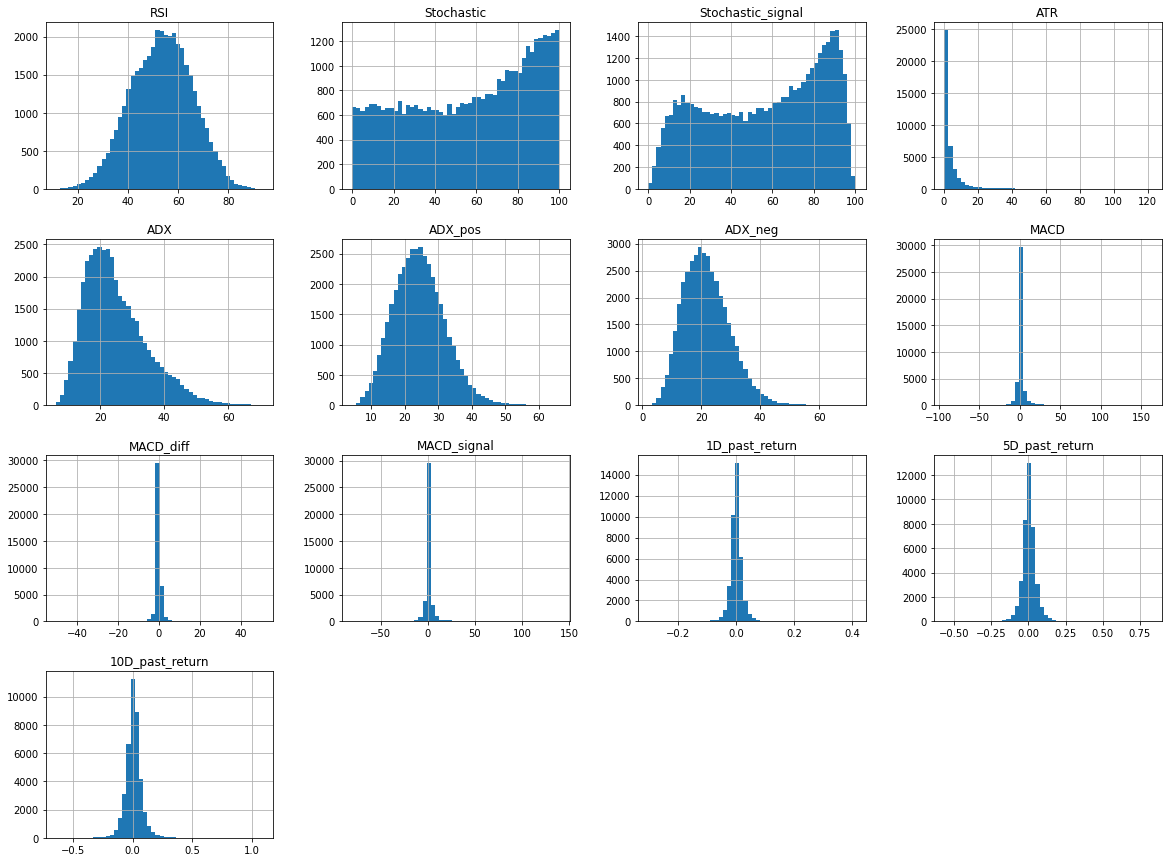

In [274]:
# Plots distribution of the input df without removing outliers

joined_df[INPUT_COLS].hist(figsize=(20, 15), bins=50)
plt.show()

In [ ]:

TARGET_COLS=['10D_return_bin']
outlier_validation={'1D_past_return': [-0.3, 0.3]}

stride = 1


train_x, train_y, test_x, test_y, scaler = full_dataset_randomised_arrays_(joined_df, 
                                                                                stride=stride, 
                                                                                input_cols=INPUT_COLS, 
                                                                                outlier_threshold=1, 
                                                                                outlier_validation=outlier_validation, 
                                                                                check_train_outliers=True,
                                                                                check_test_outliers=False, 
                                                                                target_col=TARGET_COLS, 
                                                                                time_window=30,
                                                                                test_set_size='2Y')

print('')
print('')
print('### Stats ###')
print('train_x', train_x.shape)
print('train_y', train_y.shape)
print('test_x', test_x.shape)
print('test_y', test_y.shape)
print('scaler', scaler)

print('')
print('')
print('### Validation ###')


15 Companies in Dataset
Starting KHC: Company 1 of 15
Starting NXPI: Company 2 of 15
Starting AAL: Company 3 of 15
Starting EBAY: Company 4 of 15
Starting BID: Company 5 of 15
Starting AMZN: Company 6 of 15
Starting CHTR: Company 7 of 15
Starting LBTYA: Company 8 of 15
Starting CSCO: Company 9 of 15
Starting MAR: Company 10 of 15


In [251]:
train_y.shape

(234347, 1)

In [250]:
train_x.shape

(234347, 30, 13)

In [252]:
import random

# Samples n rows of train_x

indx = list(range(len(train_x)))
sample_indx = random.sample(indx, 100000)
X_train_sample =  train_x[[sample_indx], :][0]
y_train_sample = train_y[[sample_indx]]

/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [253]:
y_train_sample.shape

(100000, 1)

In [254]:
test_y.shape

(46873, 1)

In [255]:
from tensorflow.keras.metrics import Precision
from tensorflow.keras import regularizers
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam, Adamax

optim = RMSprop(learning_rate=0.0001)
precision = Precision()

def init_model():
    model = Sequential()
    reg_l1 = regularizers.l1(0.001)
    reg_l2 = regularizers.l2(0.001)
    reg_l1_l2 = regularizers.l1_l2(l1=0.001, l2=0.001)
    model.add(layers.LSTM(200, return_sequences=True, input_shape=(30,13), activation='tanh'))
    model.add(layers.LSTM(200, activation='tanh'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(200, activation='relu', kernel_regularizer=reg_l1))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='relu', bias_regularizer=reg_l2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(50, activation='relu', activity_regularizer=reg_l1_l2))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=[precision, 'accuracy'])
    
    return model

In [256]:
model = init_model()

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

model.fit(train_x, train_y, 
          epochs=500, 
          batch_size=16,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/500
11718/11718 [==============================] - 101s 9ms/step - loss: 1.3201 - precision_18: 0.5655 - accuracy: 0.5558 - val_loss: 0.7063 - val_precision_18: 0.5654 - val_accuracy: 0.5654
Epoch 2/500
11718/11718 [==============================] - 104s 9ms/step - loss: 0.6946 - precision_18: 0.5647 - accuracy: 0.5647 - val_loss: 0.6960 - val_precision_18: 0.5654 - val_accuracy: 0.5654
Epoch 3/500
11718/11718 [==============================] - 135s 11ms/step - loss: 0.6893 - precision_18: 0.5647 - accuracy: 0.5647 - val_loss: 0.6886 - val_precision_18: 0.5654 - val_accuracy: 0.5654
Epoch 4/500
11718/11718 [==============================] - 170s 15ms/step - loss: 0.6883 - precision_18: 0.5647 - accuracy: 0.5647 - val_loss: 0.6882 - val_precision_18: 0.5654 - val_accuracy: 0.5654
Epoch 5/500
11718/11718 [==============================] - 174s 15ms/step - loss: 0.6886 - precision_18: 0.5647 - accuracy: 0.5647 - val_loss: 0.6892 - val_precision_18: 0.5654 - val_accuracy: 0.5654
Ep

In [257]:
train_y.sum()/len(train_y)

0.5648504141294747

In [260]:
test_y.sum()/len(test_y)

0.5853263072557763

In [262]:
model.evaluate(test_x, test_y)

1471/1471 [==============================] - 3s 2ms/step - loss: 0.4656 - precision_18: 0.8596 - accuracy: 0.8159


[0.46557489037513733, 0.8596383929252625, 0.8158671855926514]